Task 2: Convolutional perfectly matched layer
===

Derivation
---

An alternative method in creating a simulation space with seemingly endless boundaries is the perfectly matched layer (PML). These layers are created such that any incident wave propagating inside the PML is absorbed, and another requirement is that the PML must have zero reflection at the interface.

The process in which this happens is as follows: An incident wave will initially enter the PML domain, and will be attenuated by a rate $\alpha_{PML}$ over the thickness of the layer $\Delta PML$, and then be reflected at the edge of the simulation space, which has a perfect electric conductor. 

After reflection, the wave will still be inside the PML domain, so it will be attenuated again at a rate $\alpha_{PML}$ in the layer. As a result, the wave will be attenuated by a factor $e^{-2 \alpha_{PML} \Delta PML}$. This reflection factor, in the more general 2D case, is of the form

\begin{equation}
R(\theta) = e^{-2 \eta \cos \theta \int_{0}^{\Delta PML} \sigma(x) \mathrm{d} x }
\end{equation}

however, in 1D, the incident wave is always at normal incidence to the boundary. We can take the reflection factor to be a constant

\begin{equation}
R(0) = 10^{-6}
\end{equation}

In order to reduce the reflection error from the discretization of the domain, Bérenger introduced grading the PML conductivity $\sigma$ smoothly, from zero to some maximum value at the boundary. One variation of this grading is the polynomial grading, in which the conductivity inside the PML is given by

\begin{equation}
\sigma(x) = \sigma_{max} \left( \dfrac{x}{\Delta PML} \right)^m 
\end{equation}

Here, $m$ is the order of polynomial grading; $3 \leq m \leq 4$ has been found to be optimal for FDTD, and the maximum conductivity $\sigma_{max}$ is given by

\begin{equation}
\sigma_{max} = -\dfrac{(m+1) \ln[R(0)]}{2\eta \Delta PML}
\end{equation}

In this task, we use the complex-frequency-shifted (CFS) PML method derived by Roden and Gedney. We start with Ampere's Law in the frequency domain

\begin{equation}
i \omega \epsilon E_z = \dfrac{1}{s_E} \dfrac{\partial H_y}{\partial x}
\end{equation}

in which the material where field propagates in outside the PML has zero losses, and where $s_E$ is some constant given by

\begin{equation}
s_E = 1 + \dfrac{\sigma}{i \omega \epsilon_0}
\end{equation}

The subscript $E$ indicates that this $s$ is related to the electric field. In the code, $s_E$ and $s_H$ have a small shift due to how the grid is defined. Transforming the equation for $E_z$ into the time domain,

\begin{equation}
\epsilon \dfrac{\partial E_z}{\partial t} = \bar{s_E} * \dfrac{\partial H_y}{\partial x}
\end{equation}

where $\bar{s_E}$ is defined as the Laplace transform of the original $s_E$, and $*$ indicates the convolution operator. The function $\bar{s_E}$ is given by

\begin{equation}
\bar{s_E} = \delta(t) + \zeta_E(t)
\end{equation}

hence

\begin{equation}
\epsilon \dfrac{\partial E_z}{\partial t} = \dfrac{\partial H_y}{\partial x} + \zeta_E(t) * \dfrac{\partial H_y}{\partial x}
\end{equation}


It can be shown that the discrete response of $\zeta_E (t)$ is given by

\begin{equation}
Z_E (m) = a_E \; exp\left( \dfrac{\sigma m \Delta t}{\epsilon_0} \right)
\end{equation}

where the constant $a_E$ is

\begin{equation}
a_E = \mathrm{exp}\left ( - \dfrac{\sigma \Delta t}{\epsilon_0} \right ) -1 
\end{equation}

Using the discretization of the derivatives, the update equation based on Ampere's Law now becomes

\begin{equation}
\epsilon \dfrac{1}{\Delta t} \left ( E_z \Big |^{n+1}_{i} - E_z \Big |^{n}_{i} \right ) = \dfrac{1}{\Delta x} \left ( H_y \Big |^{n+1/2}_{i+1/2} - H_y \Big |^{n+1/2}_{i-1/2} \right ) + \sum^{N-1}_{m=0} \dfrac{1}{\Delta x} Z_E (m) \left ( H_y \Big |^{n-m+1/2}_{i+1/2} - H_y \Big |^{n-m+1/2}_{i-1/2} \right )
\end{equation}

from the form of $Z_E$, the convolution can be performed in a simpler manner if we introduced a variable $\psi_E$ such that we obtain an update equation

\begin{equation}
\epsilon \dfrac{1}{\Delta t} \left ( E_z \Big |^{n+1}_{i} - E_z \Big |^{n}_{i} \right ) = \dfrac{1}{\Delta x} \left ( H_y \Big |^{n+1/2}_{i+1/2} - H_y \Big |^{n+1/2}_{i-1/2} \right ) + \psi_E \Big |^{n+1/2}_{i+1/2}
\end{equation}

The subscript indicates that this is the $\psi$ associated with updating the electric field. This variable is defined such that

\begin{equation}
\psi_E \Big |^{n+1/2}_{i+1/2} = b_E \psi_E \Big |^{n-1/2}_{i+1/2} + \dfrac{a_E}{\Delta x} \left ( H_y \Big |^{n+1/2}_{i+1/2} - H_y \Big |^{n+1/2}_{i-1/2} \right )
\end{equation}

where the constant $b_E$ defined as

\begin{equation}
b_E = \mathrm{exp}\left ( - \dfrac{\sigma \Delta t}{\epsilon_0} \right )
\end{equation}

Solving thre update equation for $E_z \Big |^{n+1}_{i+1/2}$, 

\begin{equation}
E_z \Big |^{n+1}_{i} = E_z \Big |^{n}_{i} + \dfrac{1}{\epsilon} \dfrac{\Delta t}{\Delta x} \left ( H_y \Big |^{n+1/2}_{i+1/2} - H_y \Big |^{n+1/2}_{i-1/2} \right ) + \Delta t \dfrac{1}{\epsilon} \psi_E \Big |^{n+1/2}_{i+1/2}
\end{equation}

Using a similar expression from Faraday's Law

\begin{equation}
i \omega \mu H_y = \dfrac{1}{s_H} \dfrac{\partial E_z}{\partial x}
\end{equation}

we obtain the following update equation

\begin{equation}
\mu \dfrac{1}{\Delta t} \left ( H_y \Big |^{n+1/2}_{i+1/2} - H_y \Big |^{n-1/2}_{i+1/2} \right ) = \dfrac{1}{\Delta x} \left ( E_z \Big |^{n}_{i+1} - E_z \Big |^{n}_{i} \right ) + \psi_H \Big |^{n}_{i+1}
\end{equation}

in which $\psi_H$, $a_H$, and $b_H$ are defined similarly

\begin{equation}
\psi_H \Big |^{n}_{i+1} = b_H \psi_H \Big |^{n-1/2}_{i+1/2} + \dfrac{a_H}{\Delta x} \left ( E_z \Big |^{n}_{i+1} - E_z \Big |^{n}_{i} \right )
\end{equation}

\begin{equation}
a_H = \mathrm{exp}\left ( - \dfrac{\sigma \Delta t}{\epsilon_0} \right ) -1 
\end{equation}

\begin{equation}
b_H = \mathrm{exp}\left ( - \dfrac{\sigma \Delta t}{\epsilon_0} \right )
\end{equation}

So the update equation is now

\begin{equation}
H_y \Big |^{n+1/2}_{i+1/2} =  H_y \Big |^{n-1/2}_{i+1/2} + \dfrac{1}{\mu} \dfrac{\Delta t}{\Delta x} \left ( E_z \Big |^{n}_{i+1} - E_z \Big |^{n}_{i} \right ) + \dfrac{1}{\mu} \Delta t \psi_H \Big |^{n}_{i+1}
\end{equation}

Recall that 
\begin{equation}
\dfrac{1}{\epsilon} \dfrac{\Delta t}{\Delta x} = \dfrac{\eta_0}{\epsilon_r} S_c \qquad \mathrm{and} \qquad 
\dfrac{1}{\mu} \dfrac{\Delta t}{\Delta x} = \dfrac{1}{\mu_r \eta_0} S_c
\end{equation}

\end{equation}

and we note that in our implementation $\Delta t$ and $\Delta x$, and the Courant number are all set to unity. 

The final update equations are now

\begin{equation}
H_y \Big |^{n+1/2}_{i+1/2} =  H_y \Big |^{n-1/2}_{i+1/2} + \dfrac{1}{\mu_r \eta_0} \left ( E_z \Big |^{n}_{i+1} - E_z \Big |^{n}_{i} \right ) + \dfrac{1}{\mu_r \eta_0} \psi_H \Big |^{n}_{i+1}
\end{equation}

\begin{equation}
E_z \Big |^{n+1}_{i} = E_z \Big |^{n}_{i} + \dfrac{\eta_0}{\epsilon_r} \left ( H_y \Big |^{n+1/2}_{i+1/2} - H_y \Big |^{n+1/2}_{i-1/2} \right ) + \dfrac{\eta_0}{\epsilon_r} \psi_E \Big |^{n+1/2}_{i+1/2}
\end{equation}

Python implementation
----

First, we begin with importing the libraries for plotting and for the mathematical functions used in the simulation.

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math as m

fignum = 0

We also define the size of the domain in both space and time, as well as a few other parameters for the source. Here, we also initialize the electric and magnetic fields to be zero, and the position array.

In [8]:
epsilon = 5                      #permittivity
imp0 = 337.0                      #impedance

nx = 500

srcori = int(nx/2)                #source is at center
srcwid = 30.0*np.sqrt(epsilon)    #source width
srcdel = 10*srcwid                #source delay

nt = int((nx+srcdel)*np.sqrt(epsilon))

ez = np.zeros(nx)
hy = np.zeros(nx)
x = np.arange(0,nx-1,1)

We define variables for the reflection factor $R(0)$, the polynomial grading $m$, the thickness of the PML $\Delta PML$, and the maximum conductivity $\sigma_{max}$. 

In [9]:
R0 = 1e-6          # reflection factor
gra = 4             # order of polynomial grading
dpml = 20           # number of PML cells

smax = -((gra+1)*m.log(R0))/(2*imp0*dpml)

Defining the polynomial grading at the boundaries. 

Here we define the arrays \texttt{es} and \texttt{hs} for the complex phase $\psi$ for the electric and magnetic fields. Note that the are only defined from 0 to $\Delta PML$ on the left side, and from $nx$ to $nx-\Delta PML$ on the other end; for anywhere else in the array, \texttt{es} and \texttt{hs} are zero.

In [10]:
es = np.zeros(nx)
hs = np.zeros(nx)

#polynomial gradng of the conductivity at the boundaries
for i in range(dpml):
    #for the left side of the PML
    es[i+1] = smax*((dpml-i-0.5)/dpml)**gra
    hs[i] = smax*((dpml-i)/dpml)**gra  
    
    #for the right side of the PML
    es[nx-i-1] = smax*((dpml-i-0.5)/dpml)**gra 
    hs[nx-i-1] = smax*((dpml-i)/dpml)**gra

We define constants $a$ and $b$ for both electric and magnetic fields, and we initialize the array for the phase $\psi$.

In [11]:
ea = np.exp(-es*imp0)-1
eb = np.exp(-es*imp0)

ha = np.exp(-hs*imp0)-1
hb = np.exp(-hs*imp0)

psihy = np.zeros(nx)
psiez = np.zeros(nx)

The loop for generating the fields. Here, we added the added phase for the PML \texttt{psihy} and \texttt{psiez}. These phases change the fields at the PML domains.

Notice that after each reflection, the field amplitude is drastically reduced.

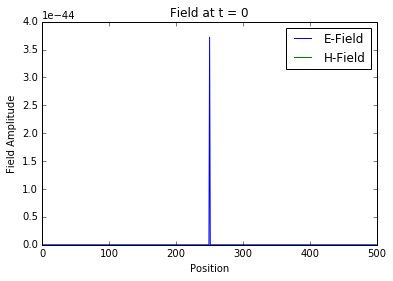

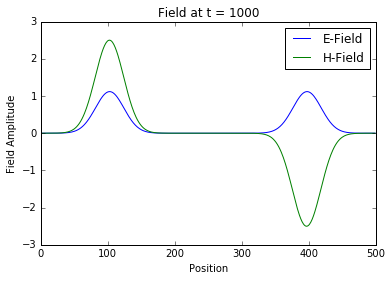

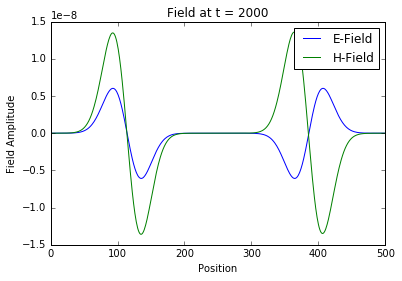

In [12]:
for dt in range(0,nt):
    psihy[x] = hb[x]*psihy[x] + ha[x]*(ez[x+1] - ez[x])
    hy[x] = hy[x] + (ez[x+1] - ez[x])/imp0 + psihy[x]/imp0
    
    psiez[x+1] = eb[x+1]*psiez[x+1] + ea[x+1]*(hy[x+1]-hy[x])
    ez[x+1] = ez[x+1] + (hy[x+1]-hy[x])*imp0/epsilon + psiez[x+1]*imp0/epsilon

    ez[srcori] += m.exp(-((dt-srcdel)*(dt-srcdel))/(srcwid*srcwid))

    plt.hold(True)
    if (dt % 1000 == 0 and dt < 7000 ):
        fignum = fignum + 1
        plt.figure(fignum)
        plt.title("Field at t = " + str(dt))
        plt.ylabel("Field Amplitude")
        plt.xlabel("Position")
        plt.plot(ez, label="E-Field")
        plt.plot(hy*imp0, label="H-Field")
        plt.legend()

References
---

Inan, U. S. & Marshall, R. A. *Numerical electromagnetics: the FDTD method.* (Cambridge University Press, 2011).

Roden, J. A. & Gedney, S. D. *Convolution PML (CPML): An efficient FDTD implementation of the CFS-PML for arbitrary media.* Microwave and Optical Technology Letters 27, 334–339 (2000).

Schneider, J. B. *Understanding the finite-difference time-domain method.* School of electrical engineering and computer science Washington State University.–URL: http://www. Eecs. Wsu. Edu/∼ schneidj/ufdtd/(request data: 29.11. 2012) (2010).
